<a href="https://colab.research.google.com/github/renee-kh4n/STINTSY-MP/blob/main/Chipmunk_Wave_Function_MP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to the problem/task and dataset

Each group should select one real-world dataset from the list of datasets provided for the project. Each dataset is accompanied with a description file, which also contains detailed description of each feature.

**The target task (i.e., classification or regression) should be properly stated as well.**

# Description of the dataset


*   State a brief description of the dataset.
  *   The Labor Force Survey (LFS) is a nationwide survey of households conducted quarterly to gather data on the demographic and socio-economic characteristics of the population. It is primarily geared towards the estimation of the levels of employment and unemployment in the country. One of the objectives of the Labor Force Survey is to provide a quantitative framework for the preparation of plans and formulation of policies affecting the labor market. Specifically, the survey is designed to provide statistics on levels and trends of employment, unemployment and underemployment of the country, as a whole, and for the 17 administrative regions.
  * Date made Sep 14, 2021
*   Provide a description of the collection process executed to build the dataset. **Discuss the implications of the data collection method on the generated conclusions and insights. Note that you may need to look at relevant sources related to the dataset to acquire necessary information for this part of the project.**
  * A total national sample of 42,768 sample housholds (rounds with Batanes sample) or 42,576 sample households (rounds without Batanes sample) will be alloted per survey round deemed sufficient to provide more precise and reliable estimates at the national and regional levels only.
  * The survey involves the collection of data on demographic and socio-economic characteristics of the population in general. The reporting unit is the household which means that statistics emanating from this survey refers to the characteristics of the population residing in private households. Persons who belongs to the institutional population are not within the scope of the survey.
  * Individual or Person and Persons 15 years old and over
  * Dates of collection: Start - 2016-04-08 End 2016-04-30
  * Mode of data collection - Face-to-face [f2f]
  * ISH FORM 2 (LFS questionnaire) is a four-page, forty three-column questionnaire that is being used in the quarterly rounds of the Labor Force Survey nationwide. This questionnaire gathers data on the demographic and economic characteristics of the population.
  * All incomplete, inconsistent, and unreasonable entries found in the questionnaires during the manual processing will be verified in the field and rectified.
  * Response rate - The response rates for LFS April 2016 round is 95.7% . The response rate is the ratio of the total responding households to the total number of eligible households. Eligible households include those who were completely interviewed, refused to be interviewed or were temporarily away or not at home or on vacation during the survey round.


* Implication here ------
* Describe the structure of the dataset file.
   *   What does each row and column represent?
      * 1 row is a survey or 1 person and 1 column is a question in the survey
   *   How many instances are there in the dataset?
      * 180,862 instances
   *   How many features are there in the dataset?
      * 50 features
*   Discuss the features in each dataset file. What does each feature represent? All features, even those which are not used for the study, should be described to the reader. The purpose of each feature in the dataset should be clear to the reader of the notebook without having to go through an external link.

# List of requirements

List all the Python libraries and modules that you used.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import seaborn as sns

# Data preprocessing and cleaning

*   If needed, perform preprocessing techniques to transform the data to the appropriate representation. This may include binning, log transformations, conversion to one-hot encoding, normalization, standardization, interpolation, truncation, and feature engineering, among others. There should be a correct and proper justification for the use of each preprocessing technique used in the project.
*   Make sure that the data is clean, especially features that are used in the project. This may include checking for misrepresentations, checking the data type, dealing with missing data, dealing with duplicate data, and dealing with outliers, among others. There should be a correct and proper justification for the application (or non-application) of each data cleaning method used in the project. Clean only the variables utilized in the study.



In [ ]:
csv_file = "LFS PUF April 2016.CSV"
df = pd.read_csv(csv_file)

The dataframe has a 180862 rows and 50 columns

In [ ]:
df.shape

(180862, 50)

The .head() and .tail() functions were used to see the actual values of the rows, so that we can get a glimpse of the data. Because of it, we can see that the data has a lot of missing values such that we need to figure out what these missing values are and why they exists in the first place.

In [ ]:
df.head()

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,,,,,,,,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,,,,,,,,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,,,,,,,,1,96,1


In [ ]:
df.tail()

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
180857,17,59,5900,40880,2,239.4341,4,2016,258,1,...,,,,,,,,1,50,1
180858,17,59,5900,40880,2,189.8885,4,2016,258,1,...,,8,,,,2,,,,3
180859,17,59,5900,40880,2,207.7395,4,2016,258,1,...,,,,,,,,,,
180860,17,59,5900,40880,2,207.7395,4,2016,258,1,...,,,,,,,,,,
180861,17,59,5900,40880,2,277.5219,4,2016,258,1,...,,,,,,,,1,01,1


Based on the data types of the dataframe, there are 15 numeric columns and 35 categorical columns

In [ ]:
df.dtypes

,0
PUFREG,int64
PUFPRV,int64
PUFPRRCD,int64
PUFHHNUM,int64
PUFURB2K10,int64
PUFPWGTFIN,float64
PUFSVYMO,int64
PUFSVYYR,int64
PUFPSU,int64
PUFRPL,int64


Checking for duplicate rows to maintain data integrity

In [ ]:
df.duplicated().sum()

0

Here we look for the missing values, but there doesn't seem to be any null values even though that we have seen missing values on the data. Because of this, the null values might not actually be null values rather empty strings or strings with only whitespaces.

In [ ]:
df.isnull().sum()

,0
PUFREG,0
PUFPRV,0
PUFPRRCD,0
PUFHHNUM,0
PUFURB2K10,0
PUFPWGTFIN,0
PUFSVYMO,0
PUFSVYYR,0
PUFPSU,0
PUFRPL,0


After checking for whitespaces, it can be seen that it was indeed whitespaces that was previously percieved as null values.

In [ ]:
whitespace = df.applymap(lambda x: isinstance(x, str) and all(c in ' \t\n' for c in x)).sum()
whitespace

<ipython-input-281-674c1e2bb4f3>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  whitespace = df.applymap(lambda x: isinstance(x, str) and all(c in ' \t\n' for c in x)).sum()


,0
PUFREG,0
PUFPRV,0
PUFPRRCD,0
PUFHHNUM,0
PUFURB2K10,0
PUFPWGTFIN,0
PUFSVYMO,0
PUFSVYYR,0
PUFPSU,0
PUFRPL,0


Then we replace the whitespaces into NaN or null values, for easier handling and manipulation later on.

In [ ]:
df = df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == '' else x)

<ipython-input-282-baa630cc5ee7>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == '' else x)


In [ ]:
whitespace = df.applymap(lambda x: isinstance(x, str) and all(c in ' \t\n' for c in x)).sum()
whitespace

<ipython-input-283-674c1e2bb4f3>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  whitespace = df.applymap(lambda x: isinstance(x, str) and all(c in ' \t\n' for c in x)).sum()


,0
PUFREG,0
PUFPRV,0
PUFPRRCD,0
PUFHHNUM,0
PUFURB2K10,0
PUFPWGTFIN,0
PUFSVYMO,0
PUFSVYYR,0
PUFPSU,0
PUFRPL,0


Checkng to see if the conversion was done correctly.

In [ ]:
df.isnull().sum()

,0
PUFREG,0
PUFPRV,0
PUFPRRCD,0
PUFHHNUM,0
PUFURB2K10,0
PUFPWGTFIN,0
PUFSVYMO,0
PUFSVYYR,0
PUFPSU,0
PUFRPL,0


Changed the data types to their correct data types.

In [ ]:
numeric_to_object_columns = ['PUFREG', 'PUFPRV', 'PUFPRRCD', 'PUFHHNUM', 'PUFURB2K10', 'PUFSVYMO', 'PUFSVYYR', 'PUFPSU', 'PUFC01_LNO', 'PUFC03_REL', 'PUFC04_SEX']
df[numeric_to_object_columns] = df[numeric_to_object_columns].astype('object')

object_to_numeric_columns = ['PUFC18_PNWHRS', 'PUFC19_PHOURS', 'PUFC25_PBASIC', 'PUFC27_NJOBS', 'PUFC28_THOURS']
df[object_to_numeric_columns] = df[object_to_numeric_columns].apply(pd.to_numeric, errors='coerce')

Resulting into 9 numeric columns and 41 categorical columns

In [ ]:
df.dtypes

,0
PUFREG,object
PUFPRV,object
PUFPRRCD,object
PUFHHNUM,object
PUFURB2K10,object
PUFPWGTFIN,float64
PUFSVYMO,object
PUFSVYYR,object
PUFPSU,object
PUFRPL,int64


We then only take people who have job which is represented as those with a '1' in their PUFNEWEMPSTAT column resulting in the new dataframe called df_with_job.

In [ ]:
df_with_job = df[df['PUFNEWEMPSTAT'] == '1']

Dropped 'PUFNEWEMPSTAT', because we no longer care about the status of employment as our focus remains on the data of employed people.


In [ ]:
df_with_job.drop(['PUFNEWEMPSTAT'], axis=1, inplace=True)
df_with_job.shape

<ipython-input-288-93b5421a4bd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_job.drop(['PUFNEWEMPSTAT'], axis=1, inplace=True)


(71355, 49)

DROPPING need reason

In [ ]:
columns_to_drop = ['PUFPRRCD', 'PUFHHNUM', 'PUFPWGTFIN', 'PUFSVYMO', 'PUFSVYYR', 'PUFPSU', 'PUFRPL', 'PUFC01_LNO']

df_with_job.drop(columns=columns_to_drop, inplace=True)

<ipython-input-289-158dbd9f07b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_job.drop(columns=columns_to_drop, inplace=True)


PUFC08_CURSCH will be removed since it was only asked on people aged 15-25 which does not represent the entirety of the data and would lead to a biased result

In [ ]:
df_with_job.drop('PUFC08_CURSCH', axis=1, inplace=True)
df_with_job.shape

<ipython-input-290-7bb47810cb0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_job.drop('PUFC08_CURSCH', axis=1, inplace=True)


(71355, 40)

This is now the complete list of the current column names.

In [ ]:
column_names = ["PUFREG", "PUFPRV", "PUFURB2K10", "PUFHHSIZE", "PUFC03_REL", "PUFC04_SEX", "PUFC05_AGE", "PUFC06_MSTAT", "PUFC07_GRADE", "PUFC09_GRADTECH", "PUFC10_CONWR"
                "PUFC11_WORK", "PUFC12_JOB", "PUFC14_PROCC", "PUFC16_PKB", "PUFC17_NATEM", "PUFC18_PNWKRS", "PUFC19_PHOURS", "PUFC20_PMWORE", "PUFC21_PLADDW", "PUFC22_PFWRK",
                "PUFC23_PCLASS", "PUFC24_PBASIS", "PUFC25_PBASIC", "PUFC26_OJOB", "PUFC27_NJOBS", "PUFC28_THOURS", "PUFC29_VWMW48H", "PUFC41_WQTR", "PUFC43_QKB"]

The .head() and .tail() functions were used again to get a glimpse of the data of the new dataframe.

In [ ]:
df_with_job.head()

,PUFREG,PUFPRV,PUFURB2K10,PUFHHSIZE,PUFC03_REL,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC09_GRADTECH,...,PUFC32_JOBSM,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB
0,1,28,2,3,1,1,49,2,350,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01
1,1,28,2,3,2,2,61,2,350,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01
2,1,28,2,3,3,1,19,1,350,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01
3,1,28,2,4,1,1,48,2,320,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01
4,1,28,2,4,2,2,41,2,350,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,96


In [ ]:
df_with_job.tail()

,PUFREG,PUFPRV,PUFURB2K10,PUFHHSIZE,PUFC03_REL,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC09_GRADTECH,...,PUFC32_JOBSM,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB
180848,17,59,2,6,3,1,25,1,634,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,85
180850,17,59,2,7,1,1,34,2,000,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03
180851,17,59,2,7,2,2,32,2,000,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01
180857,17,59,2,5,1,1,29,2,350,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,50
180861,17,59,2,5,8,1,18,1,350,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01


We check for null values again, and address them accordingly.

In [ ]:
df_with_job.isnull().sum()

,0
PUFREG,0
PUFPRV,0
PUFURB2K10,0
PUFHHSIZE,0
PUFC03_REL,0
PUFC04_SEX,0
PUFC05_AGE,0
PUFC06_MSTAT,0
PUFC07_GRADE,0
PUFC09_GRADTECH,0


The first column with null values is PUFC12_JOB which are people who did not work for the past week but had a job or business. This is explainable by people who did work for the past week, which makes them ineligable to answer this, so we check the amount of people who answered yes to working for the week and compare it with the null values  on PUFC12_JOB.

In [ ]:
work_job_check = df_with_job.loc[(df_with_job['PUFC11_WORK'] == '1'), 'PUFC12_JOB']
amount = len(work_job_check)
uniques = work_job_check.unique()

print("Amount of people who did not work for the past quarter:", amount)
print("Corresponding particiaption in a job for the past week:", uniques)

Amount of people who did not work for the past quarter: 70279
Corresponding particiaption in a job for the past week: [nan]


Because we removed some rows by filtering only people with jobs it is important to check the remaining answers as it may not be the same with the original set of answers.

In [ ]:
uniques_23 = df_with_job['PUFC23_PCLASS'].unique()
uniques_24 = df_with_job['PUFC24_PBASIS'].unique()
print("Unique values in 23:", uniques_23)
print("Unique values in 24:", uniques_24)

Unique values in 23: ['3' '6' '1' '0' '2' '4' '5']
Unique values in 24: [nan '3' '4' '7' '1' '2' '0' '6' '5']


The next colum with null values is PUFC24_PBASIS which is the basis of payment of the person. The only way for this to be null is such that the worker either doesn't get paid or they own the business itself. This is exactly the case when checking it with PUFC23_PCLASS which classifies what class of worker is the person where '3' is Self-employed without any paid employee, '4' is Employer in own family-operated farm or business, and '6' is Worked without pay on own family-operated farm or business.

In [ ]:
class_basis_pay_special_check = df_with_job.loc[(df_with_job['PUFC23_PCLASS'].isin(['3', '4', '6'])), 'PUFC24_PBASIS']
amount = len(class_basis_pay_special_check)
uniques = class_basis_pay_special_check.unique()

print("Amount of people with unpaid worker class:", amount)
print("Corresponding basis of payment:", uniques)

Amount of people with unpaid worker class: 29440
Corresponding basis of payment: [nan]


We then check for the rest of the answers PUFC23_PCLASS which should not result into a null value in PUFC24_PBASIS.

In [ ]:
class_basis_pay_check = df_with_job.loc[(df_with_job['PUFC23_PCLASS'].isin(['0', '1', '2', '5'])), 'PUFC24_PBASIS']
amount = len(class_basis_pay_check)
uniques = class_basis_pay_check.unique()

print("Amount of people with normal worker class:", amount)
print("Corresponding basis of payment type:", uniques)

Amount of people with normal worker class: 41915
Corresponding basis of payment type: ['3' '4' '7' '1' '2' '0' '6' '5']


Following this is PUFC25_PBASIC which is the basic pay of the person, and naturally follows the previous column where if the worker doesn't get paid or they own the business itself they would be ineligable for this column. However, this does not cover all of the null values.

In [ ]:
class_basic_pay_special_check = df_with_job.loc[(df_with_job['PUFC23_PCLASS'].isin(['3', '4', '6'])), 'PUFC25_PBASIC']
amount = len(class_basic_pay_special_check)
stats = class_basic_pay_special_check.describe()

print("Amount of pepole with unpaid worker class:", amount)
print("Corresponding basic pay per day:\n", stats)

Amount of pepole with unpaid worker class: 29440
Corresponding basic pay per day:
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: PUFC25_PBASIC, dtype: float64


We then check on PUFC24_PBASIS where it is '7' because it is the workers who are not paid by wages or salaries.

In [ ]:
basis_basic_pay_special_check = df_with_job.loc[(df_with_job['PUFC24_PBASIS'] == '7'), 'PUFC25_PBASIC']
amount = len(basis_basic_pay_special_check)
stats = basis_basic_pay_special_check.describe()

print("Amount of pepole with special basis of payment:", amount)
print("Corresponding basic pay per day:\n", stats)

Amount of pepole with special basis of payment: 5327
Corresponding basic pay per day:
 count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: PUFC25_PBASIC, dtype: float64


We then check for the rest of the answers PUFC24_PBASIS which should not result into a null value in PUFC25_PBASIC.

In [ ]:
basis_basic_pay_check = df_with_job.loc[(df_with_job['PUFC24_PBASIS'].isin(['0', '1', '2', '3', '4', '5', '6'])), 'PUFC25_PBASIC']
amount = len(basis_basic_pay_check)
stats = basis_basic_pay_check.describe()

print("Amount of people with normal basis of payment:", amount)
print("Corresponding basic pay per day:\n", stats)

Amount of people with normal basis of payment: 36588
Corresponding basic pay per day:
 count    36588.000000
mean       407.285941
std        464.681301
min         10.000000
25%        200.000000
50%        300.000000
75%        481.000000
max      53820.000000
Name: PUFC25_PBASIC, dtype: float64


The next column is PUFC27_NJOBS which contains the amount of other jobs the worker has, and the null values could be interpreted as those without other jobs found in PUFC26_OJOB with the answer of '2'

In [ ]:
no_other_jobs_check = df_with_job.loc[(df_with_job['PUFC26_OJOB'] == '2'), 'PUFC27_NJOBS']
amount = len(no_other_jobs_check)
uniques = no_other_jobs_check.unique()

print("Amount of people without other jobs:", amount)
print("Corresponding number of other jobs:", uniques)

Amount of people without other jobs: 65417
Corresponding number of other jobs: [nan]


We then check for the rest of the answers PUFC26_OJOB which should not result into a null value in PUFC27_NJOBS.

In [ ]:
other_jobs_check = df_with_job.loc[(df_with_job['PUFC26_OJOB'] == '1'), 'PUFC27_NJOBS']
amount = len(other_jobs_check)
uniques = other_jobs_check.unique()

print("Amount of people with other jobs:", amount)
print("Corresponding number of other jobs:", uniques)

Amount of people with other jobs: 5938
Corresponding number of other jobs: [1. 2. 3. 5. 4.]


In [ ]:
no_other_jobs_check = df_with_job.loc[(df_with_job['PUFC28_THOURS'] == '2'), 'PUFC29_WWM48H']
amount = len(no_other_jobs_check)
uniques = no_other_jobs_check.unique()

print("Amount of people without other jobs:", amount)
print("Corresponding number of other jobs:", uniques)

Amount of people without other jobs: 0
Corresponding number of other jobs: []


In [ ]:
reason_48 = df_with_job['PUFC29_WWM48H'].unique()
reason_48

array([nan, '2', '1', '3', '4', '5'], dtype=object)

In [ ]:
no_reason_48 = df_with_job['PUFC29_WWM48H'].isnull().sum()
no_reason_48

54122

Features PUFC30 to PUFC40 are removed because these are only relevant to jobless people

In [ ]:
columns_30_40 = ['PUFC30_LOOKW', 'PUFC31_FLWRK', 'PUFC32_JOBSM', 'PUFC33_WEEKS', 'PUFC34_WYNOT', 'PUFC35_LTLOOKW', 'PUFC36_AVAIL', 'PUFC37_WILLING', 'PUFC38_PREVJOB', 'PUFC40_POCC']

df_with_job.drop(columns_30_40, axis=1, inplace=True)
df_with_job.shape

<ipython-input-307-b109121a4f27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_job.drop(columns_30_40, axis=1, inplace=True)


(71355, 30)

In [ ]:
work_quarter = df_with_job['PUFC41_WQTR'].unique()
work_quarter

array(['1', '2'], dtype=object)

In [ ]:
without_work_quarter = (df_with_job['PUFC41_WQTR'] == '2').sum()
without_work_quarter

1636

In [ ]:
work_quarter_week_check = df_with_job.loc[(df_with_job['PUFC41_WQTR'] == '2'), 'PUFC11_WORK']
work_check_len = len(work_quarter_week_check)
work_check_unique = work_quarter_week_check.unique()
count = work_quarter_week_check.value_counts()

print("Amount of people who did not work for the past quarter:", work_check_len)
print("Corresponding people who worked or did not work for the past week:", work_check_unique)
print(count)

Amount of people who did not work for the past quarter: 1636
Corresponding people who worked or did not work for the past week: ['1' '2']
PUFC11_WORK
1    1607
2      29
Name: count, dtype: int64


In [ ]:
job_quarter_week_check = df_with_job.loc[(df_with_job['PUFC41_WQTR'] == '2'), 'PUFC12_JOB']
amount = len(job_quarter_week_check)
uniques = job_quarter_week_check.unique()
count = job_quarter_week_check.value_counts()

print("Amount of people who did not work for the past quarter:", amount)
print("Corresponding people who did not work for the past week but has a job:", uniques)
print(count)

Amount of people who did not work for the past quarter: 1636
Corresponding people who did not work for the past week but has a job: [nan '1']
PUFC12_JOB
1    29
Name: count, dtype: int64


due to inconsistent data for people who did not work for the past quarter but worked for the past week the 1607 rows will be removed to preserve data integrity

In [ ]:
df_with_job = df_with_job.drop(df_with_job.loc[(df_with_job['PUFC41_WQTR'] == '2') & (df_with_job['PUFC11_WORK'] == '1')].index)
df_with_job.shape

(69748, 30)

In [ ]:
quarter_industry_check = df_with_job.loc[(df_with_job['PUFC41_WQTR'] == '2'), 'PUFC43_QKB']
amount = len(quarter_industry_check)
uniques = quarter_industry_check.unique()
count = quarter_industry_check.value_counts()

print("Amount of people who did not work for the past quarter:", amount)
print("Corresponding industry of the people for the past quarter:", uniques)
print(count)

Amount of people who did not work for the past quarter: 29
Corresponding industry of the people for the past quarter: [nan]
Series([], Name: count, dtype: int64)


In [ ]:
df_with_job.isnull().sum()

,0
PUFREG,0
PUFPRV,0
PUFURB2K10,0
PUFHHSIZE,0
PUFC03_REL,0
PUFC04_SEX,0
PUFC05_AGE,0
PUFC06_MSTAT,0
PUFC07_GRADE,0
PUFC09_GRADTECH,0


In [ ]:
fill_0_numeric_columns = ['PUFC25_PBASIC', 'PUFC27_NJOBS']
fill_0_categorical_columns = ['PUFC12_JOB', 'PUFC29_WWM48H', 'PUFC43_QKB']

df_with_job[fill_0_numeric_columns] = df_with_job[fill_0_numeric_columns].fillna(0)
df_with_job[fill_0_categorical_columns] = df_with_job[fill_0_categorical_columns].fillna('0')
df_with_job['PUFC24_PBASIS'] = df_with_job['PUFC24_PBASIS'].fillna('8')

df_with_job.isnull().sum()

,0
PUFREG,0
PUFPRV,0
PUFURB2K10,0
PUFHHSIZE,0
PUFC03_REL,0
PUFC04_SEX,0
PUFC05_AGE,0
PUFC06_MSTAT,0
PUFC07_GRADE,0
PUFC09_GRADTECH,0


In [ ]:
binary_columns = ['PUFURB2K10', 'PUFC04_SEX', 'PUFC11_WORK', 'PUFC20_PWMORE', 'PUFC21_PLADDW', 'PUFC22_PFWRK', 'PUFC26_OJOB', 'PUFC41_WQTR']
df_with_job[binary_columns] = df_with_job[binary_columns].apply(pd.to_numeric, errors='coerce')
df_with_job[binary_columns] = df_with_job[binary_columns].replace(2, 0)

In [ ]:
df_with_job.dtypes

,0
PUFREG,object
PUFPRV,object
PUFURB2K10,int64
PUFHHSIZE,int64
PUFC03_REL,object
PUFC04_SEX,int64
PUFC05_AGE,int64
PUFC06_MSTAT,object
PUFC07_GRADE,object
PUFC09_GRADTECH,object


In [ ]:
categorical_columns = [
    'PUFREG', 'PUFPRV', 'PUFC03_REL', 'PUFC06_MSTAT',
    'PUFC07_GRADE', 'PUFC09_GRADTECH', 'PUFC10_CONWR', 'PUFC12_JOB',
    'PUFC14_PROCC', 'PUFC16_PKB', 'PUFC23_PCLASS', 'PUFC24_PBASIS',
    'PUFC29_WWM48H', 'PUFC43_QKB'
]

column_order = list(df_with_job.columns)

encoder = OneHotEncoder(drop=None, sparse_output=False)

encoded_array = encoder.fit_transform(df_with_job[categorical_columns])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns))

encoded_df.index = df_with_job.index

df = pd.concat([df_with_job.drop(columns=categorical_columns), encoded_df], axis=1)

In [ ]:
null_columns = df.isnull().sum()
null_columns = null_columns[null_columns > 0]
print(null_columns)

Series([], dtype: int64)


In [ ]:
df.shape

(69748, 449)

In [ ]:
numerical_columns = [
    'PUFURB2K10', 'PUFHHSIZE', 'PUFC04_SEX', 'PUFC05_AGE', 'PUFC11_WORK',
    'PUFC18_PNWHRS', 'PUFC19_PHOURS', 'PUFC20_PWMORE', 'PUFC21_PLADDW',
    'PUFC22_PFWRK', 'PUFC25_PBASIC', 'PUFC26_OJOB', 'PUFC27_NJOBS',
    'PUFC28_THOURS', 'PUFC41_WQTR'
]

# Exploratory data analysis

Perform exploratory data analysis comprehensively to gain a good understanding of your dataset. In this section of the notebook, you must present relevant numerical summaries and visualizations. Make sure that each code is accompanied by a brief explanation. The whole process should be supported with verbose textual descriptions of your procedures and findings.

In [ ]:
df_with_job.describe(include='object')

,PUFREG,PUFPRV,PUFC03_REL,PUFC06_MSTAT,PUFC07_GRADE,PUFC09_GRADTECH,PUFC10_CONWR,PUFC12_JOB,PUFC14_PROCC,PUFC16_PKB,PUFC17_NATEM,PUFC23_PCLASS,PUFC24_PBASIS,PUFC29_WWM48H,PUFC43_QKB
count,69748,69748,69748,69748,69748,69748,69748,69748,69748,69748,69748,69748,69748,69748,69748
unique,17,86,11,6,66,2,2,2,43,87,3,7,9,6,89
top,13,76,1,2,350,2,5,0,92,01,1,1,8,0,01
freq,10288,4170,32524,46859,19231,65895,69745,68672,9113,16928,53515,31273,28804,52784,17287


In [ ]:
df_with_job.describe(include='number')

,PUFURB2K10,PUFHHSIZE,PUFC04_SEX,PUFC05_AGE,PUFC11_WORK,PUFC18_PNWHRS,PUFC19_PHOURS,PUFC20_PWMORE,PUFC21_PLADDW,PUFC22_PFWRK,PUFC25_PBASIC,PUFC26_OJOB,PUFC27_NJOBS,PUFC28_THOURS,PUFC41_WQTR
count,69748.000000,69748.000000,69748.000000,69748.000000,69748.000000,69748.000000,69748.000000,69748.000000,69748.000000,69748.000000,69748.000000,69748.000000,69748.000000,69748.000000,69748.000000
mean,0.433174,5.130369,0.617351,39.365114,0.984573,7.493677,40.896212,0.195102,0.104505,0.018294,210.462551,0.084318,0.092433,41.978007,0.999584
std,0.495518,2.364512,0.486037,14.243941,0.123244,2.488900,19.504825,0.396282,0.305916,0.134015,393.369310,0.277866,0.318405,19.227618,0.020387
min,0.000000,1.000000,0.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,28.000000,1.000000,6.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000
50%,0.000000,5.000000,1.000000,38.000000,1.000000,8.000000,42.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000,46.000000,1.000000
75%,1.000000,6.000000,1.000000,50.000000,1.000000,8.000000,48.000000,0.000000,0.000000,0.000000,308.000000,0.000000,0.000000,48.000000,1.000000
max,1.000000,23.000000,1.000000,99.000000,1.000000,16.000000,112.000000,1.000000,1.000000,1.000000,53820.000000,1.000000,5.000000,112.000000,1.000000


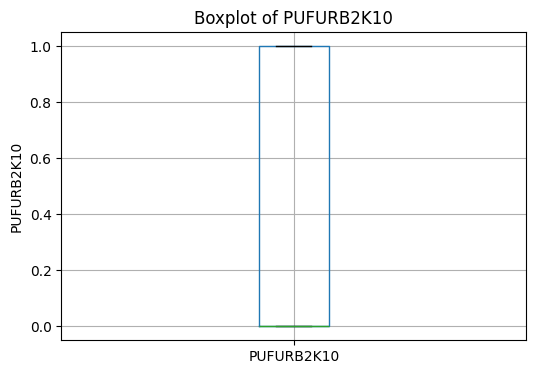

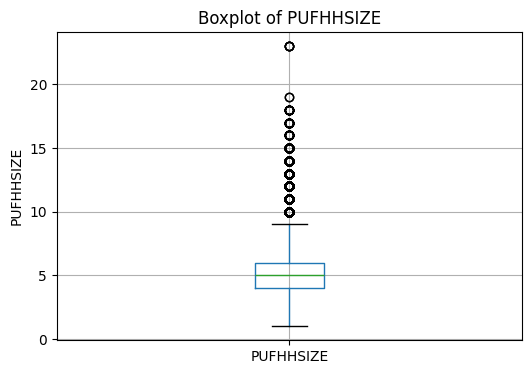

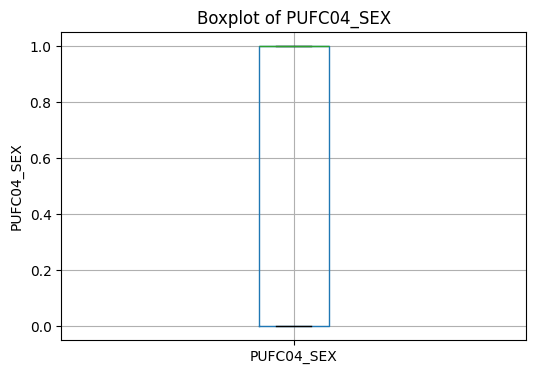

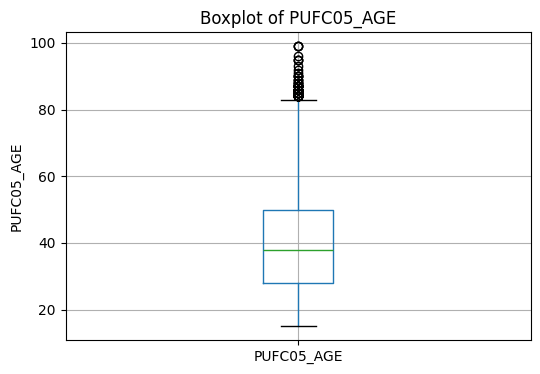

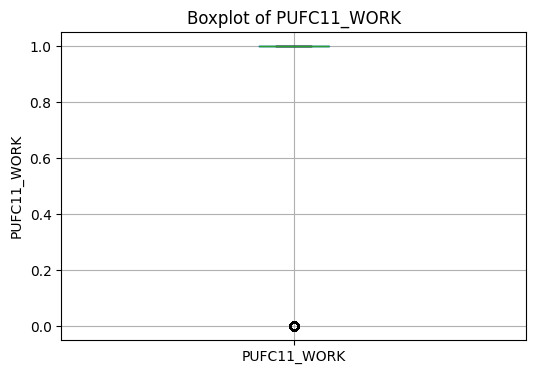

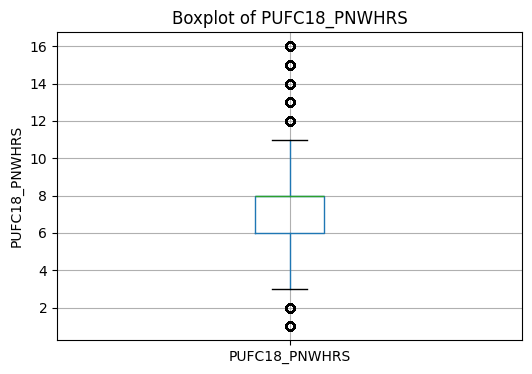

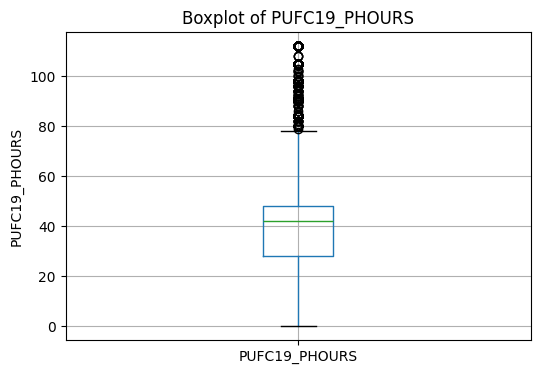

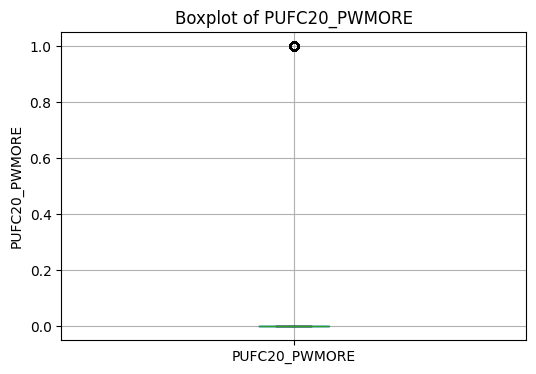

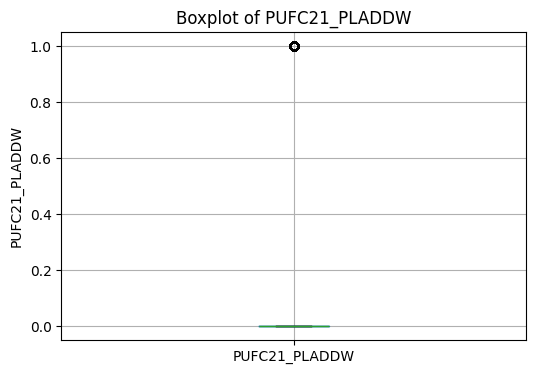

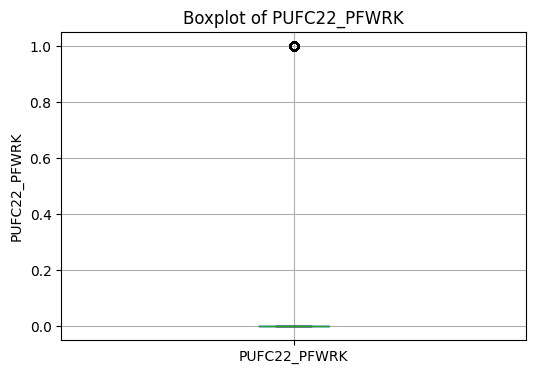

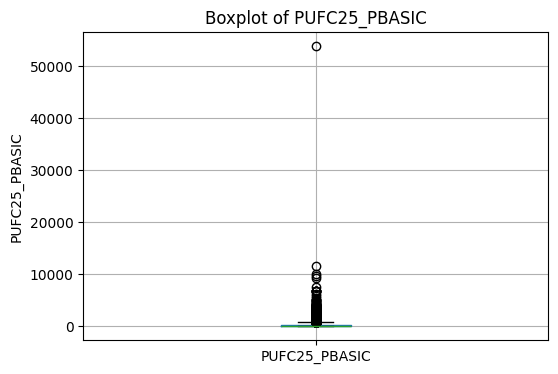

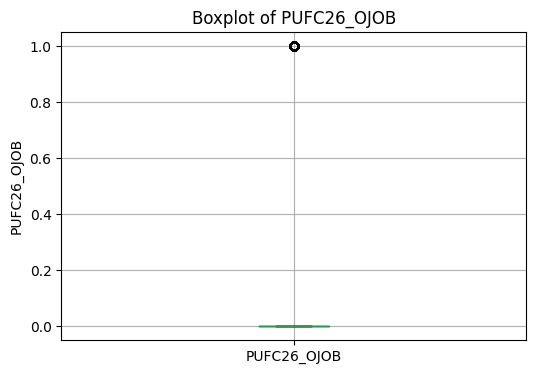

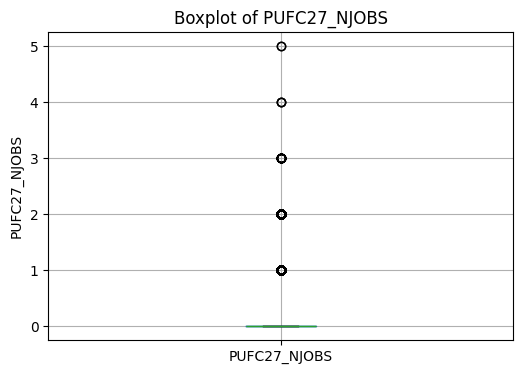

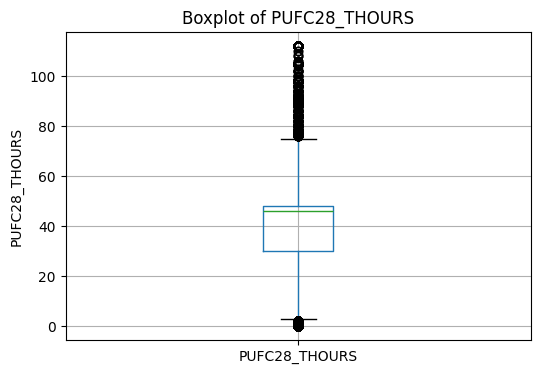

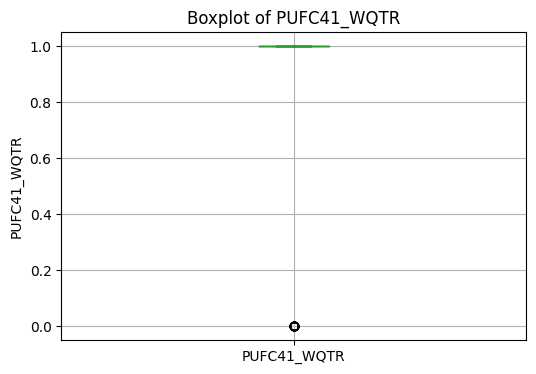

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    df_with_job.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

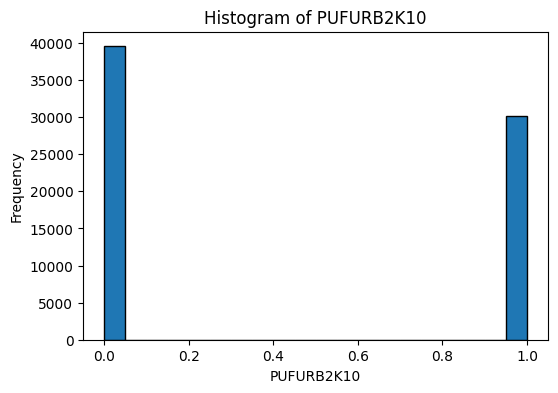

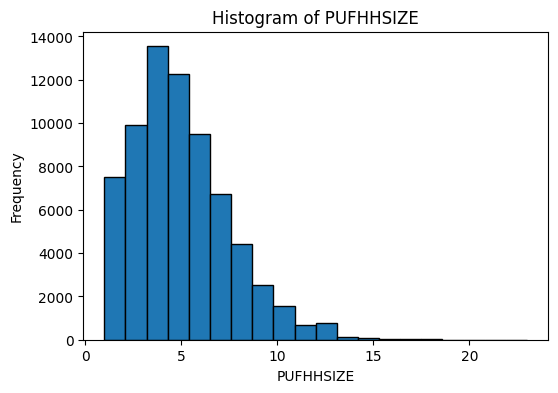

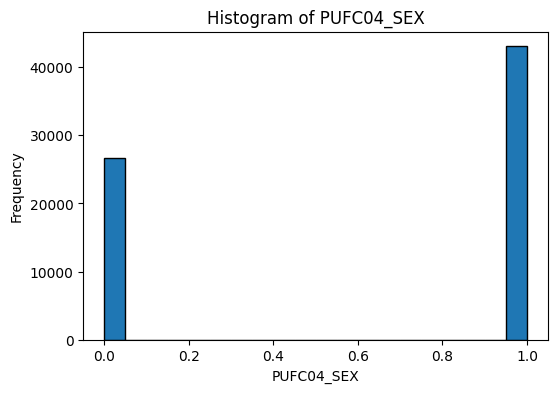

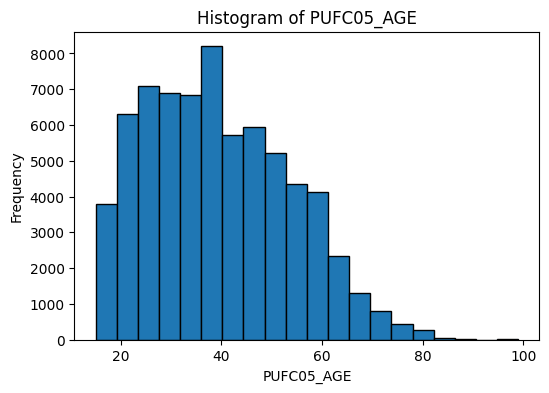

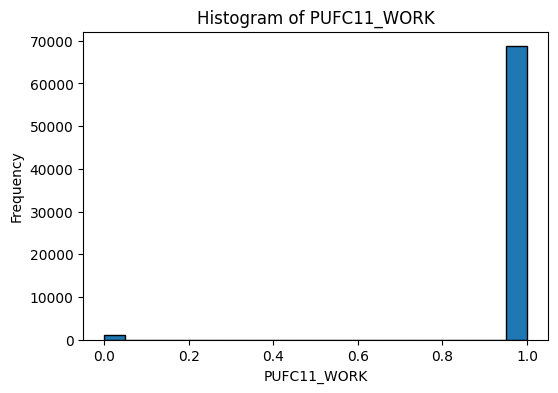

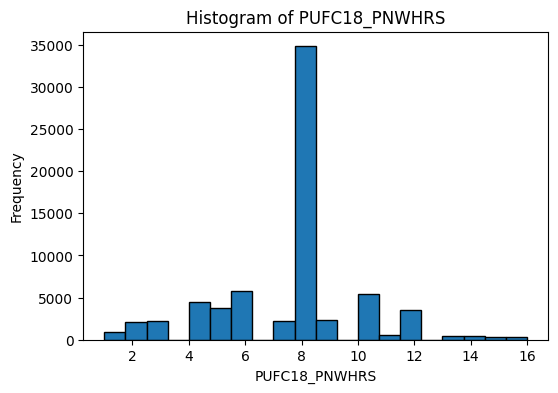

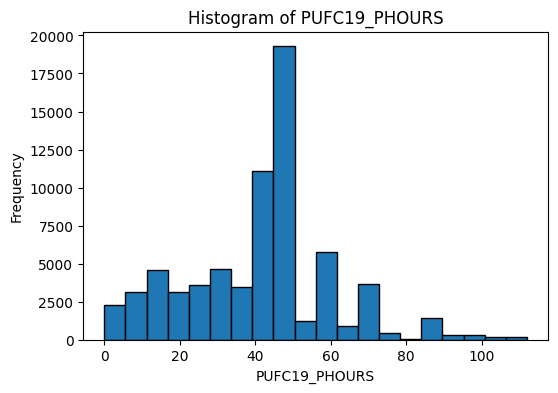

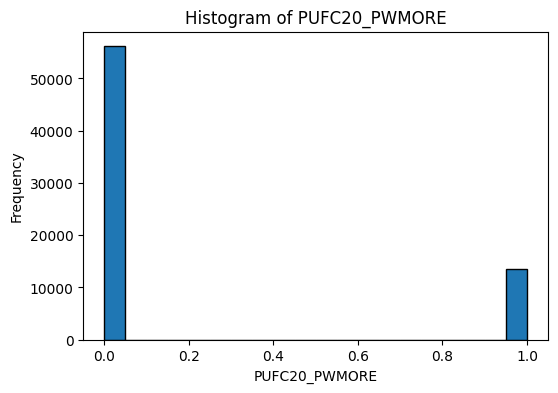

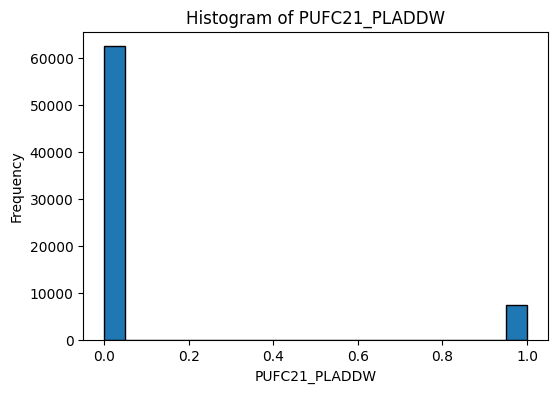

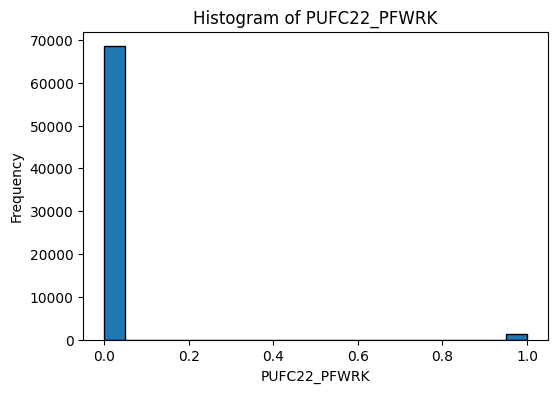

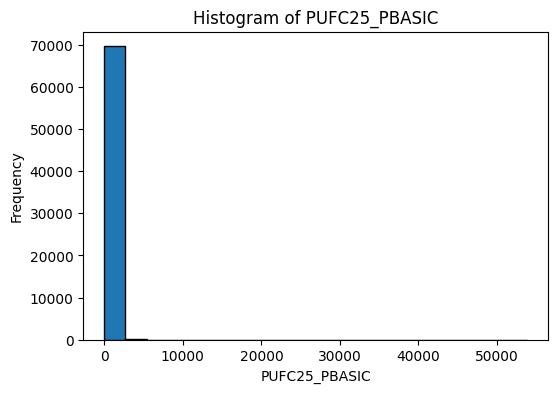

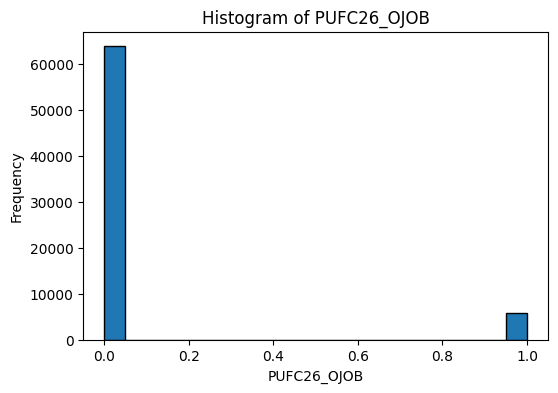

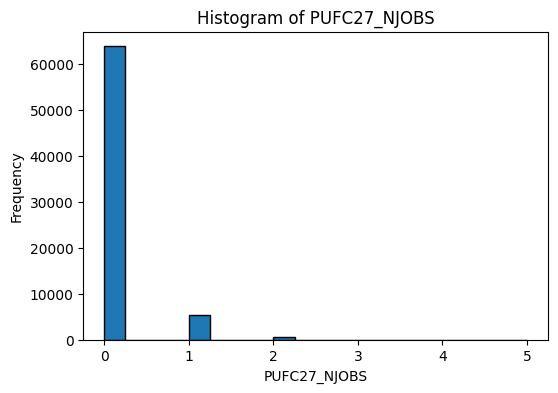

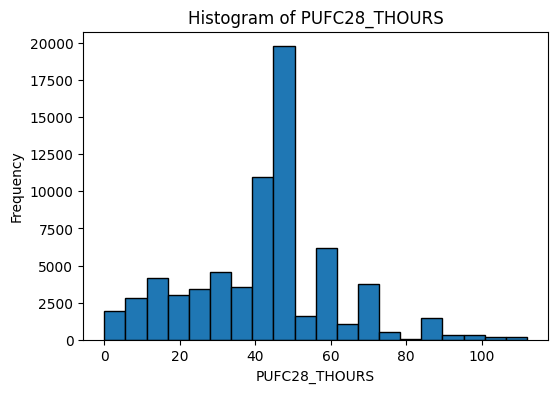

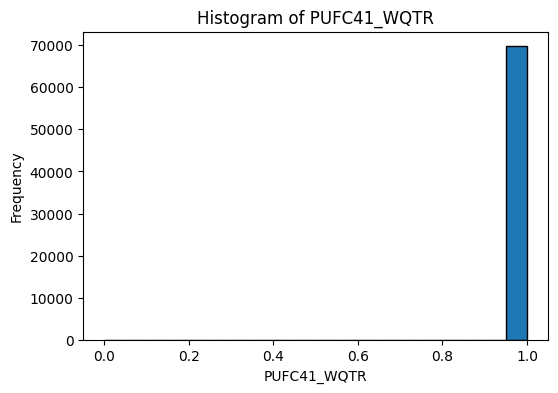

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df_with_job[col].dropna(), bins=20, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

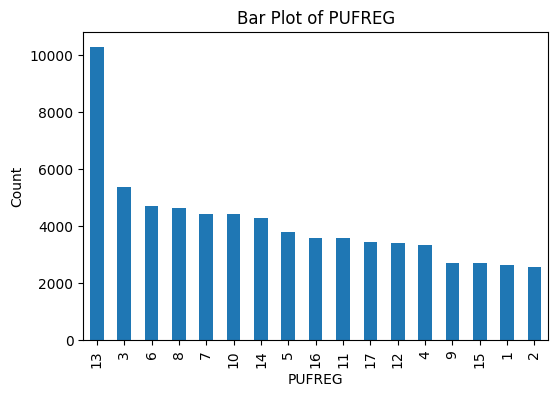

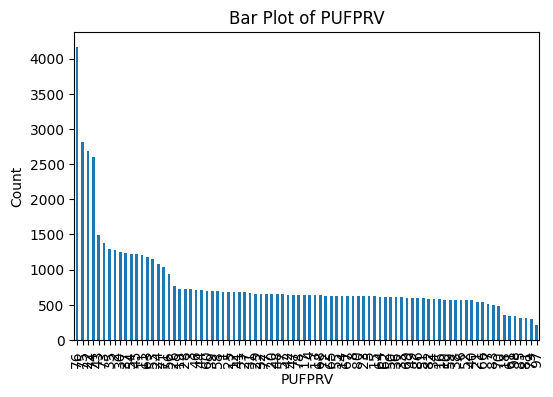

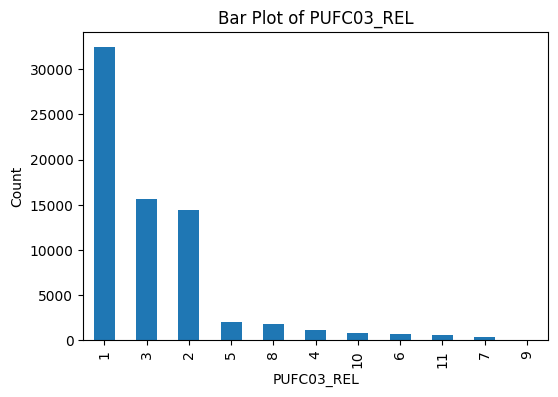

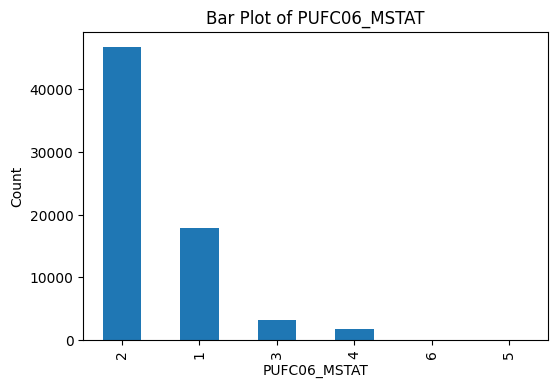

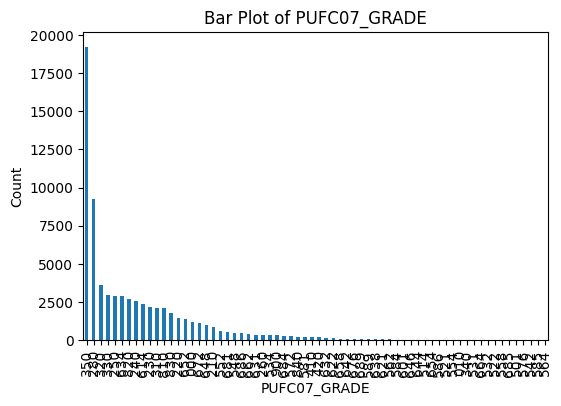

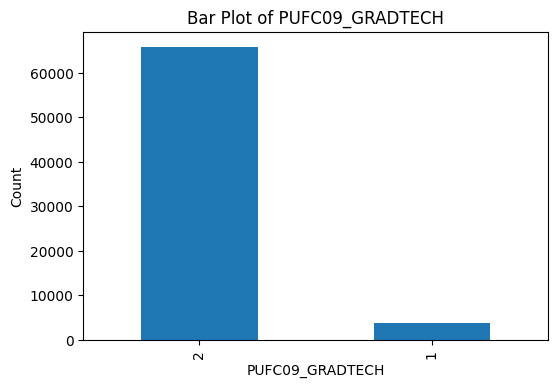

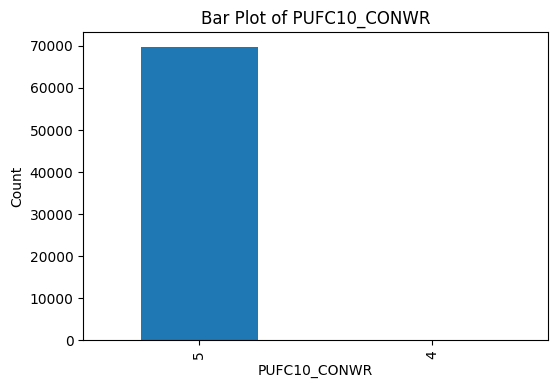

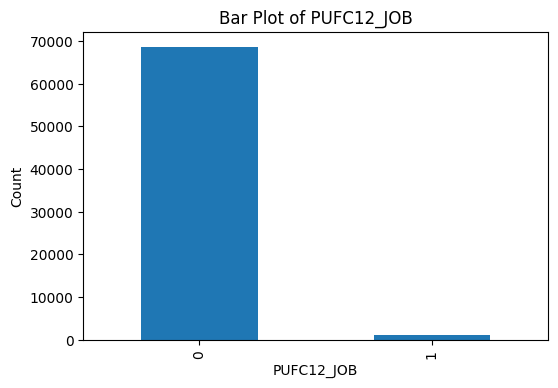

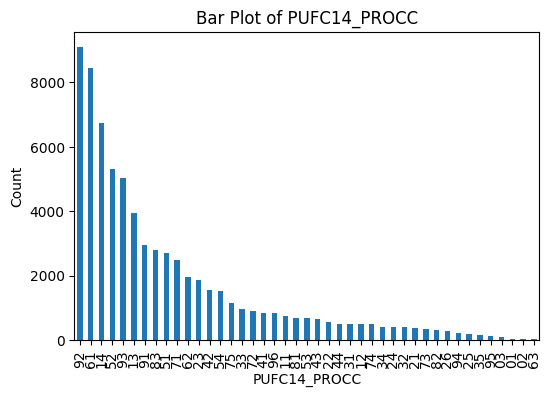

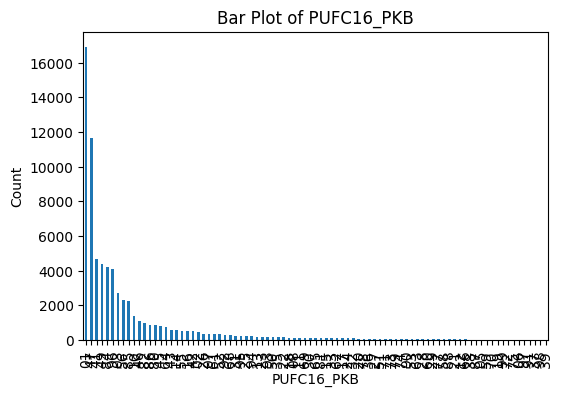

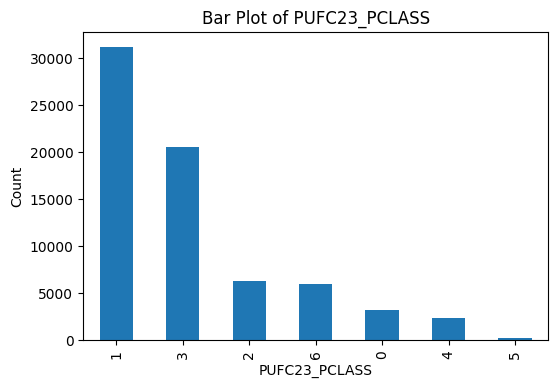

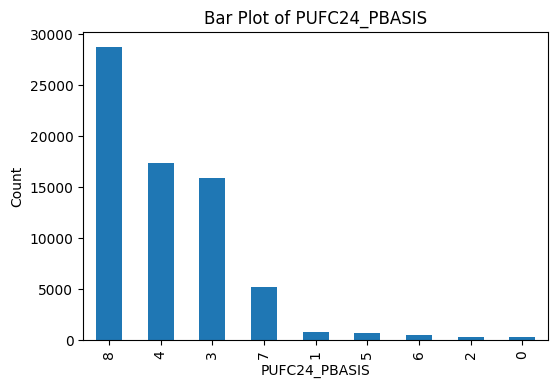

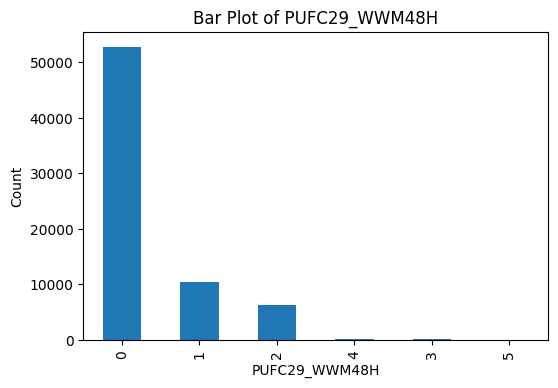

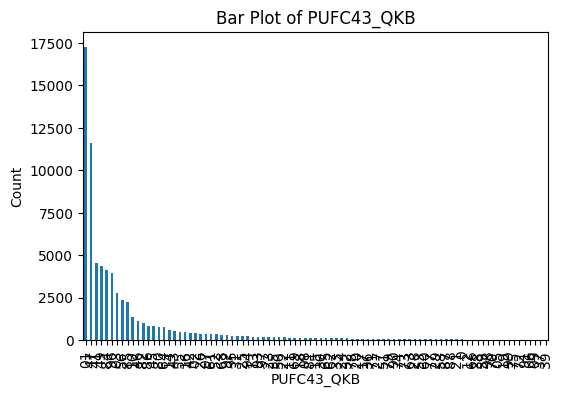

In [ ]:
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    df_with_job[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

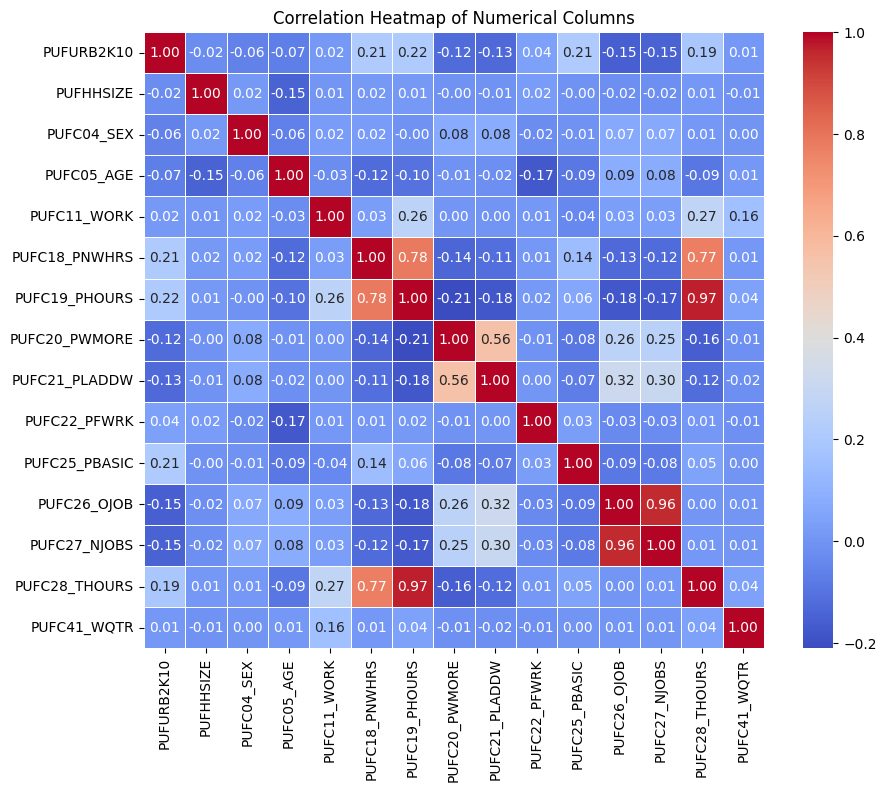

In [ ]:
corr_matrix = df_with_job[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

<Figure size 600x400 with 0 Axes>

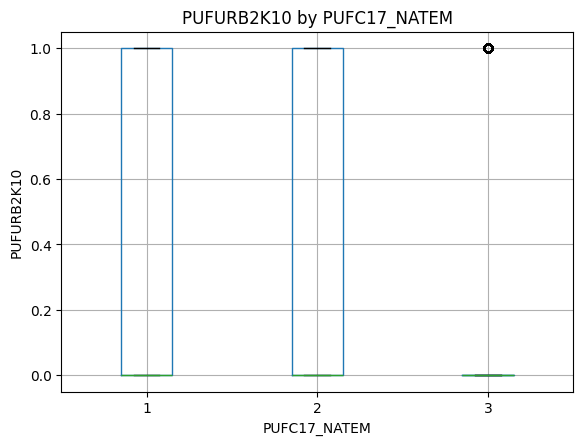

<Figure size 600x400 with 0 Axes>

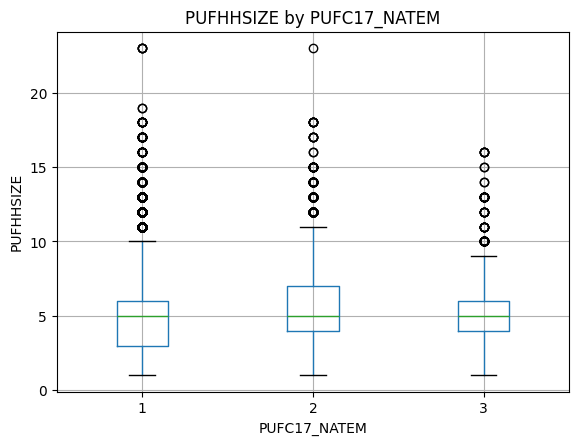

<Figure size 600x400 with 0 Axes>

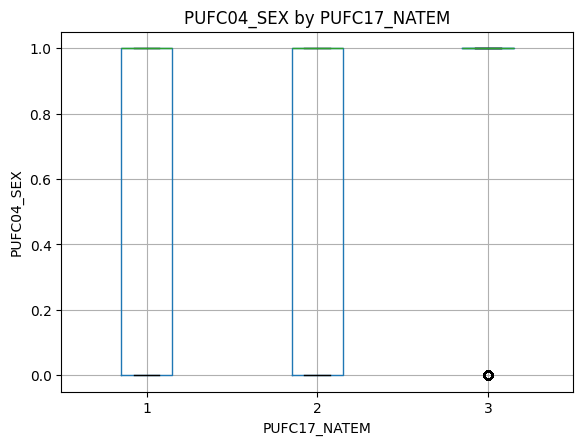

<Figure size 600x400 with 0 Axes>

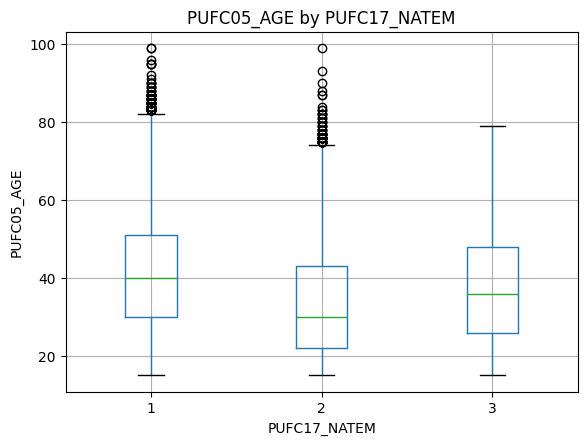

<Figure size 600x400 with 0 Axes>

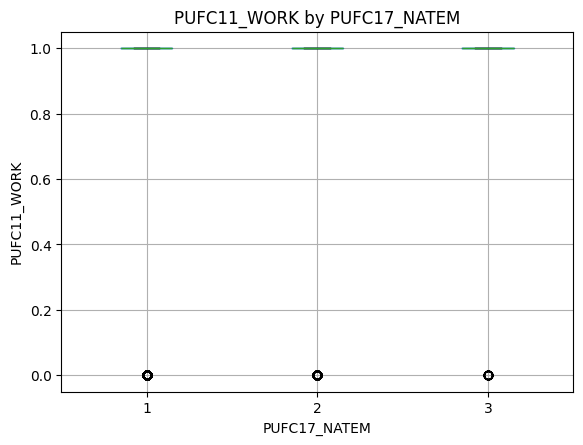

<Figure size 600x400 with 0 Axes>

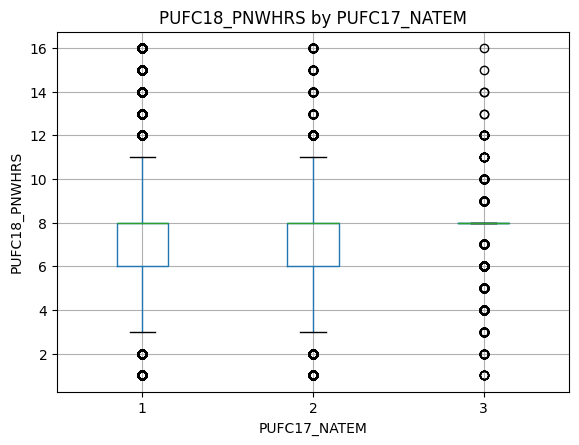

<Figure size 600x400 with 0 Axes>

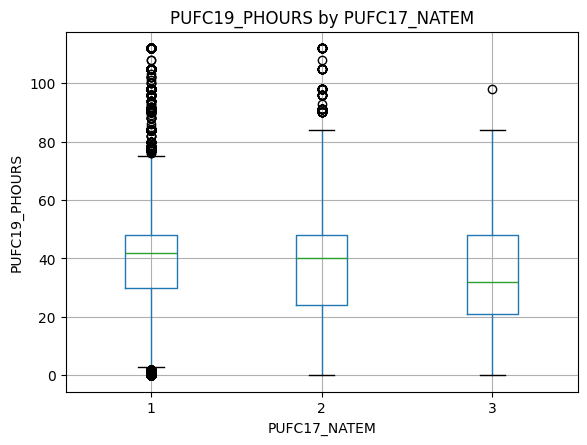

<Figure size 600x400 with 0 Axes>

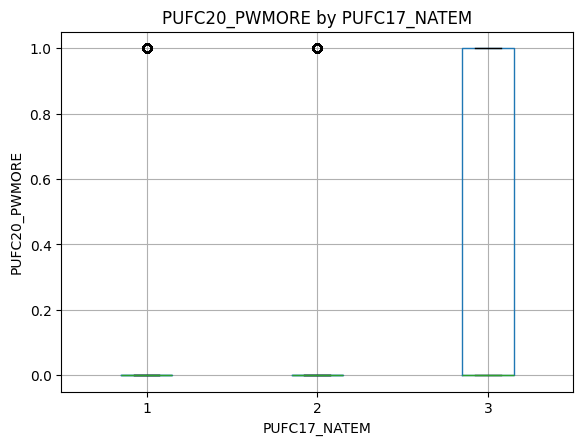

<Figure size 600x400 with 0 Axes>

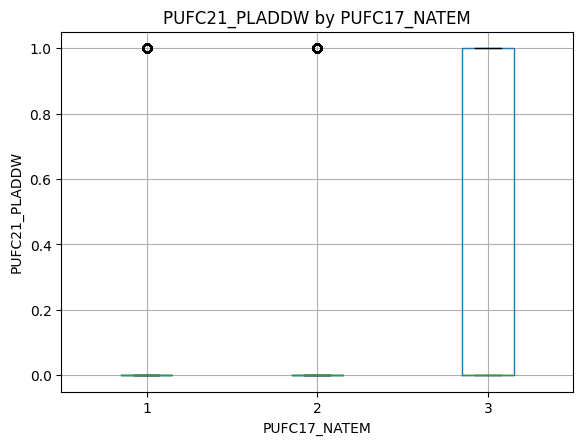

<Figure size 600x400 with 0 Axes>

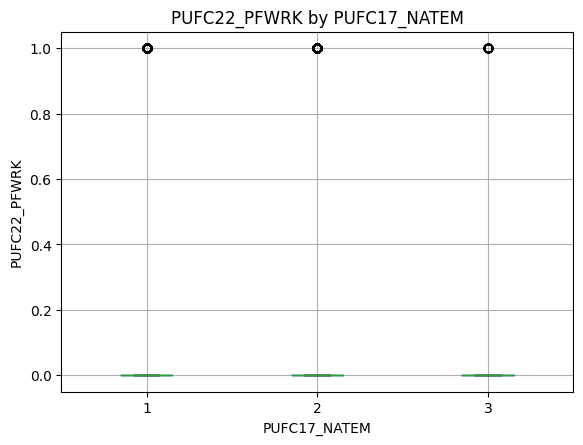

<Figure size 600x400 with 0 Axes>

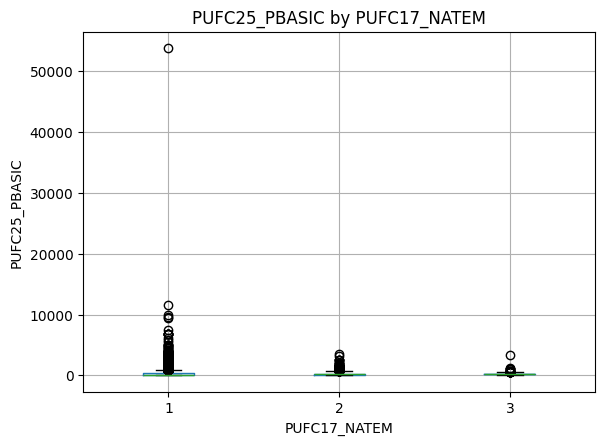

<Figure size 600x400 with 0 Axes>

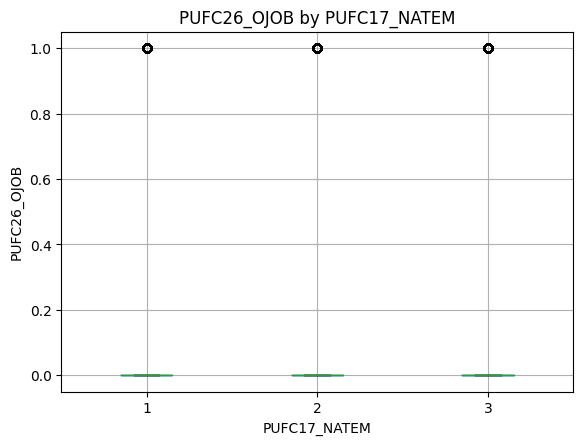

<Figure size 600x400 with 0 Axes>

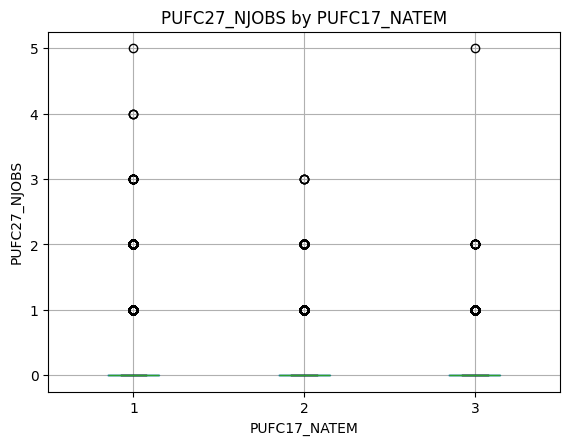

<Figure size 600x400 with 0 Axes>

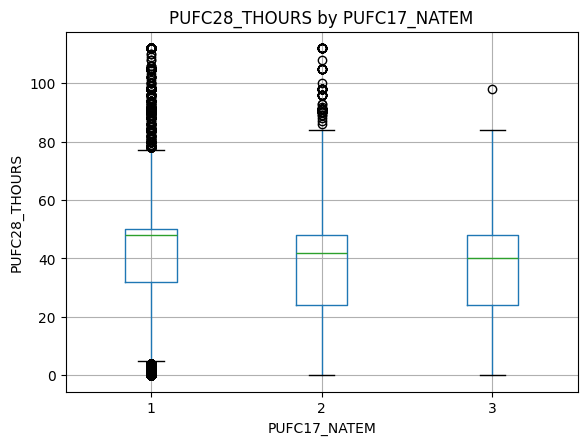

<Figure size 600x400 with 0 Axes>

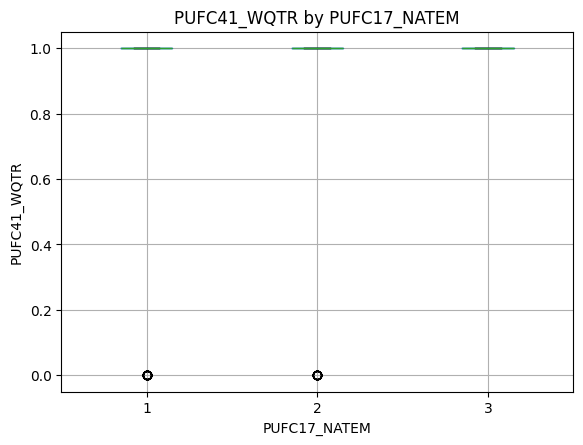

In [ ]:
categorical_col = 'PUFC17_NATEM'

for num_col in numerical_columns:
    plt.figure(figsize=(6, 4))
    df_with_job.boxplot(column=num_col, by=categorical_col)
    plt.title(f'{num_col} by {categorical_col}')
    plt.suptitle('')
    plt.xlabel(categorical_col)
    plt.ylabel(num_col)
    plt.show()

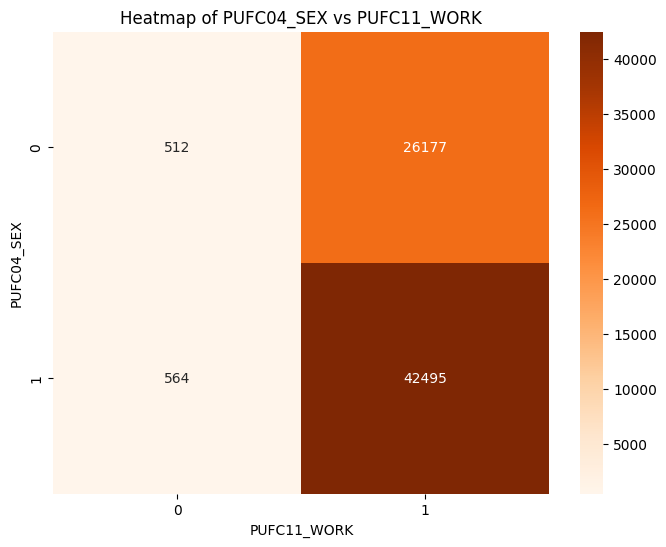

In [ ]:
ct = pd.crosstab(df_with_job['PUFC04_SEX'], df_with_job['PUFC11_WORK'])

plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, fmt="d", cmap='Oranges')
plt.title('Heatmap of PUFC04_SEX vs PUFC11_WORK')
plt.xlabel('PUFC11_WORK')
plt.ylabel('PUFC04_SEX')
plt.show()


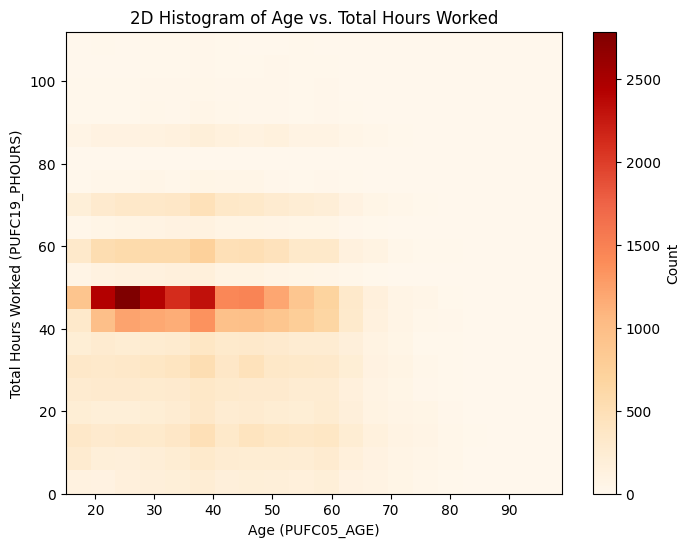

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist2d(df_with_job['PUFC05_AGE'], df_with_job['PUFC19_PHOURS'], bins=(20, 20), cmap='OrRd')
plt.colorbar(label='Count')
plt.title('2D Histogram of Age vs. Total Hours Worked')
plt.xlabel('Age (PUFC05_AGE)')
plt.ylabel('Total Hours Worked (PUFC19_PHOURS)')
plt.show()


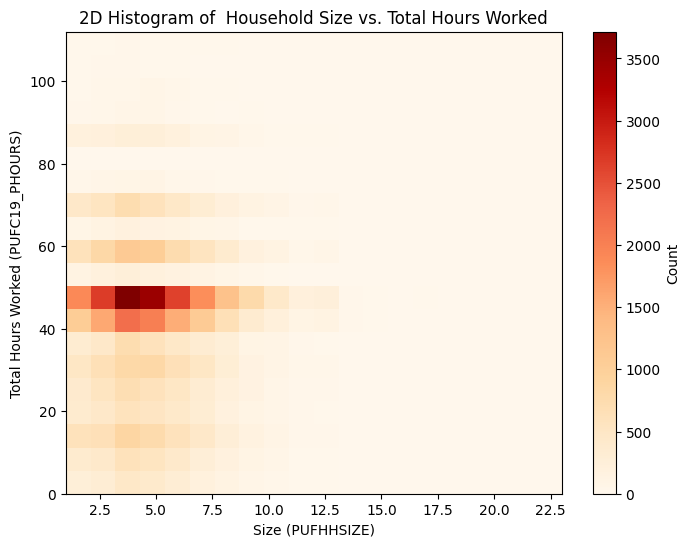

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist2d(df_with_job['PUFHHSIZE'], df_with_job['PUFC19_PHOURS'], bins=(20, 20), cmap='OrRd')
plt.colorbar(label='Count')
plt.title('2D Histogram of  Household Size vs. Total Hours Worked')
plt.xlabel('Size (PUFHHSIZE)')
plt.ylabel('Total Hours Worked (PUFC19_PHOURS)')
plt.show()


<Figure size 2000x600 with 0 Axes>

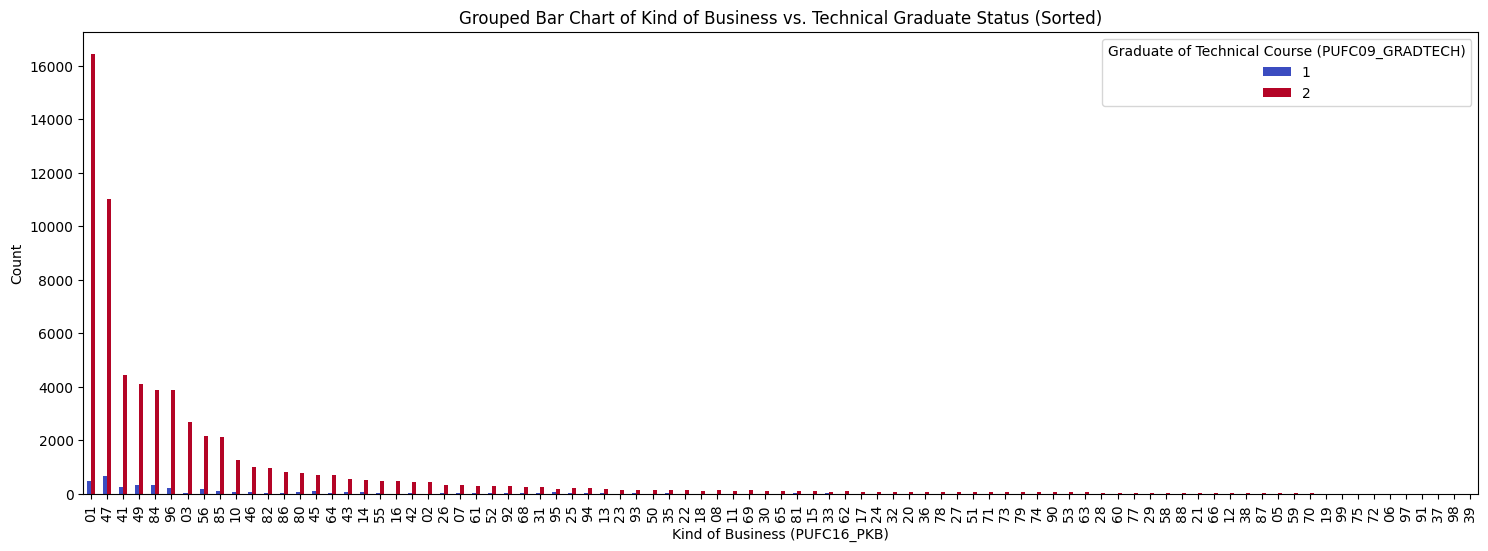

In [ ]:
ct = pd.crosstab(df_with_job['PUFC16_PKB'], df_with_job['PUFC09_GRADTECH'])

ct = ct.loc[ct.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(20, 6))
ct.plot(kind='bar', colormap='coolwarm', figsize=(18, 6))
plt.title('Grouped Bar Chart of Kind of Business vs. Technical Graduate Status (Sorted)')
plt.xlabel('Kind of Business (PUFC16_PKB)')
plt.ylabel('Count')
plt.legend(title="Graduate of Technical Course (PUFC09_GRADTECH)")
plt.xticks(rotation=90)
plt.show()

In [ ]:
categorical_col = 'PUFC17_NATEM'

anova_results = []

for num_col in numerical_columns:
    if pd.api.types.is_numeric_dtype(df_with_job[num_col]):

        valid_data = df_with_job[[categorical_col, num_col]].dropna()

        groups = []
        for cat in valid_data[categorical_col].unique():
            group = valid_data[valid_data[categorical_col] == cat][num_col]
            groups.append(group)

        f_stat, p_value = f_oneway(*groups)

        print(f'ANOVA between {categorical_col} and {num_col}:')
        print(f'  F-statistic: {f_stat:.4f}')
        print(f'  p-value: {p_value:.4f}')
        print('-' * 50)

        anova_results.append({
            'Numerical_Column': num_col,
            'F_statistic': f_stat,
            'p_value': p_value
        })
    else:
        print(f'Skipping {num_col}: Non-numeric column')

anova_df = pd.DataFrame(anova_results)

ANOVA between PUFC17_NATEM and PUFURB2K10:
  F-statistic: 304.8369
  p-value: 0.0000
--------------------------------------------------
ANOVA between PUFC17_NATEM and PUFHHSIZE:
  F-statistic: 103.2582
  p-value: 0.0000
--------------------------------------------------
ANOVA between PUFC17_NATEM and PUFC04_SEX:
  F-statistic: 203.6552
  p-value: 0.0000
--------------------------------------------------
ANOVA between PUFC17_NATEM and PUFC05_AGE:
  F-statistic: 1562.0207
  p-value: 0.0000
--------------------------------------------------
ANOVA between PUFC17_NATEM and PUFC11_WORK:
  F-statistic: 27.2407
  p-value: 0.0000
--------------------------------------------------
ANOVA between PUFC17_NATEM and PUFC18_PNWHRS:
  F-statistic: 74.4426
  p-value: 0.0000
--------------------------------------------------
ANOVA between PUFC17_NATEM and PUFC19_PHOURS:
  F-statistic: 428.6360
  p-value: 0.0000
--------------------------------------------------
ANOVA between PUFC17_NATEM and PUFC20_PWMOR

# Initial model training

*   The project should train and evaluate at least 3 different kinds of machine learning
models. The models should not be multiple variations of the same model, e.g., three neural network models with different number of neurons.
*   Each model should be appropriate in accomplishing the chosen task for the dataset. There should be a clear and correct justification on the use of each machine learning
model.
*   Make sure that the values of the hyperparameters of each model are mentioned. At the minimum, the optimizer, the learning rate, and the learning rate schedule should be discussed per model.
*   The report should show that the models are not overfitting nor underfitting.

In [ ]:
X = df.drop(columns=['PUFC17_NATEM'])
y = df['PUFC17_NATEM']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

num_correct = (y_predicted == y_test).sum()
num_test = len(y_test)
accuracy = accuracy_score(y_test, y_predicted)

print("Got %d / %d correct => accuracy: %f" % (num_correct, num_test, accuracy))

Got 10570 / 13950 correct => accuracy: 0.757706


In [ ]:
normalizer = MinMaxScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_columns] = normalizer.fit_transform(X_train[numerical_columns])

X_test_scaled[numerical_columns] = normalizer.transform(X_test[numerical_columns])

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

y_predicted = model.predict(X_test_scaled)

num_correct = (y_predicted == y_test).sum()
num_test = len(y_test)
accuracy = accuracy_score(y_test, y_predicted)

print("Got %d / %d correct => accuracy: %f" % (num_correct, num_test, accuracy))

Got 10933 / 13950 correct => accuracy: 0.783728


In [ ]:
standardizer = StandardScaler()

X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()

X_train_standardized[numerical_columns] = standardizer.fit_transform(X_train[numerical_columns])

X_test_standardized[numerical_columns] = standardizer.transform(X_test[numerical_columns])

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_standardized, y_train)

y_predicted = model.predict(X_test_standardized)

num_correct = (y_predicted == y_test).sum()
num_test = len(y_test)
accuracy = accuracy_score(y_test, y_predicted)

print("Got %d / %d correct => accuracy: %f" % (num_correct, num_test, accuracy))

Got 10814 / 13950 correct => accuracy: 0.775197


## Neural Networks

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import numpy as np
import torch
import csv
import math

### Neural Network class

In [ ]:
import torch.nn as nn
import torch.nn.init


class NeuralNetwork(nn.Module):

    def __init__(self,
                 input_size,
                 num_classes,
                 list_hidden,
                 activation='sigmoid'):
        """Class constructor for NeuralNetwork

        Arguments:
            input_size {int} -- Number of features in the dataset
            num_classes {int} -- Number of classes in the dataset
            list_hidden {list} -- List of integers representing the number of
            units per hidden layer in the network
            activation {str, optional} -- Type of activation function. Choices
            include 'sigmoid', 'tanh', and 'relu'.
        """
        super(NeuralNetwork, self).__init__()

        self.input_size = input_size
        self.num_classes = num_classes
        self.list_hidden = list_hidden
        self.activation = activation

        self.create_network()

    def create_network(self):
        """Creates the layers of the neural network.
        """
        layers = []

        # TODO: Revise the code below. Append a torch.nn.Linear layer to the
        # layers list with correct values for parameters in_features and
        # out_features. This is the first layer of the network.
        # HINT: You will use self.list_hidden here.
        layers.append(torch.nn.Linear(self.input_size, self.list_hidden[0]))

        # TODO: Revise the code below. Append the activation layer by calling
        # the self.get_activation() function.
        layers.append(self.get_activation(self.activation))

        # Iterate over other hidden layers just before the last layer
        for i in range(len(self.list_hidden) - 1):

            # TODO: Revise the code below. Append a torch.nn.Linear layer to
            # the layers list according to the values in self.list_hidden.
            layers.append(torch.nn.Linear(self.list_hidden[i], self.list_hidden[i+1]))

            # TODO: Revise the code below. Append the activation layer by
            # calling the self.get_activation() function.
            layers.append(self.get_activation())

        # TODO: Revise the code below. Append a torch.nn.Linear layer to the
        # layers list with correct values for parameters in_features and
        # out_features. This is the last layer of the network.
        # HINT: You will use self.list_hidden here.
        layers.append(torch.nn.Linear(self.list_hidden[-1], self.num_classes))

        layers.append(nn.Softmax(dim=1))
        self.layers = nn.Sequential(*layers)

    def init_weights(self):
        """Initializes the weights of the network. Weights of a
        torch.nn.Linear layer should be initialized from a normal
        distribution with mean 0 and standard deviation 0.1. Bias terms of a
        torch.nn.Linear layer should be initialized with a constant value of 0.
        """
        torch.manual_seed(2)

        # For each layer in the network
        for module in self.modules():

            # If it is a torch.nn.Linear layer
            if isinstance(module, nn.Linear):

                # TODO: Initialize the weights of the torch.nn.Linear layer
                # from a normal distribution with mean 0 and standard deviation
                # of 0.1.
                # HINT: Use nn.init.normal_() function.
                nn.init.normal_(module.weight ,0, 0.1)

                # TODO: Initialize the bias terms of the torch.nn.Linear layer
                # with a constant value of 0.
                # HINT: Use nn.init.constant_() function.
                nn.init.constant_(module.bias, 0)

    def get_activation(self,
                       mode='sigmoid'):
        """Returns the torch.nn layer for the activation function.

        Arguments:
            mode {str, optional} -- Type of activation function. Choices
            include 'sigmoid', 'tanh', and 'relu'.

        Returns:
            torch.nn -- torch.nn layer representing the activation function.
        """
        activation = nn.Sigmoid()

        if mode == 'tanh':
            activation = nn.Tanh()

        elif mode == 'relu':
            activation = nn.ReLU(inplace=True)

        return activation

    def forward_manual(self,
                       x,
                       verbose=False):
        """Forward propagation of the model, implemented manually.

        Arguments:
            x {torch.Tensor} -- A Tensor of shape (N, D) representing input
            features to the model.
            verbose {bool, optional} -- Indicates if the function prints the
            output or not.

        Returns:
            torch.Tensor, torch.Tensor -- A Tensor of shape (N, C) representing
            the output of the final linear layer in the network. A Tensor of
            shape (N, C) representing the probabilities of each class given by
            the softmax function.
        """

        # For each layer in the network
        for i in range(len(self.layers) - 1):

            # print('bias:')
            # print(self.layers[i].bias )

            # If it is a torch.nn.Linear layer
            if isinstance(self.layers[i], nn.Linear):
                # TODO: Compute the result of the linear layer. Do not forget
                # to add the bias term. Assign the result to x.
                # HINT: Use torch.matmul() function.
                x = torch.matmul(x, self.layers[i].weight.T)

            # If it is another function
            else:
                # Call the forward() function of the layer
                # and return the result to x.
                x = self.layers[i](x)

            if verbose:
                # Print the output of the layer
                print('Output of layer ' + str(i))
                print(x, '\n')

        # Apply the softmax function
        probabilities = self.layers[-1](x)

        if verbose:
            print('Output of layer ' + str(len(self.layers) - 1))
            print(probabilities, '\n')

        return x, probabilities

    def forward(self,
                x,
                verbose=False):
        """Forward propagation of the model, implemented using PyTorch.

        Arguments:
            x {torch.Tensor} -- A Tensor of shape (N, D) representing input
            features to the model.
            verbose {bool, optional} -- Indicates if the function prints the
            output or not.

        Returns:
            torch.Tensor, torch.Tensor -- A Tensor of shape (N, C) representing
            the output of the final linear layer in the network. A Tensor of
            shape (N, C) representing the probabilities of each class given by
            the softmax function.
        """

        # For each layer in the network
        for i in range(len(self.layers) - 1):

            # Call the forward() function of the layer
            # and return the result to x.
            x = self.layers[i](x)
            # x = x.to(self.layers[i].weight.dtype)

            if verbose:
                # Print the output of the layer
                print('Output of layer ' + str(i))
                print(x, '\n')

        # Apply the softmax function
        probabilities = self.layers[-1](x)

        if verbose:
            print('Output of layer ' + str(len(self.layers) - 1))
            print(probabilities, '\n')

        return x, probabilities

    def predict(self,
                probabilities):
        """Returns the index of the class with the highest probability.

        Arguments:
            probabilities {torch.Tensor} -- A Tensor of shape (N, C)
            representing the probabilities of N instances for C classes.

        Returns:
            torch.Tensor -- A Tensor of shape (N, ) contaning the indices of
            the class with the highest probability for N instances.
        """

        # TODO: Return the index of the class with the highest probability
        return torch.argmax(probabilities, dim=1)


### Data Loader Class

In [ ]:
import numpy as np


class DataLoader(object):

    def __init__(self, X, y, batch_size):
        """Class constructor for DataLoader

        Arguments:
            X {np.ndarray} -- A numpy array of shape (N, D) containing the
            data; there are N samples each of dimension D.
            y {np.ndarray} -- A numpy array of shape (N, 1) containing the
            ground truth values.
            batch_size {int} -- An integer representing the number of instances
            per batch.
        """
        self.X = X
        self.y = y
        self.batch_size = batch_size

        self.indices = np.array([i for i in range(self.X.shape[0])])
        np.random.seed(1)

    def shuffle(self):
        """Shuffles the indices in self.indices.
        """

        # TODO: Use np.random.shuffle() to shuffles the indices in self.indices
        np.random.shuffle(self.indices)

    def get_batch(self, mode='train'):
        """Returns self.X and self.y divided into different batches of size
        self.batch_size according to the shuffled self.indices.

        Arguments:
            mode {str} -- A string which determines the mode of the model. This
            can either be `train` or `test`.

        Returns:
            list, list -- List of np.ndarray containing the data divided into
            different batches of size self.batch_size; List of np.ndarray
            containing the ground truth labels divided into different batches
            of size self.batch_size
        """

        X_batch = []
        y_batch = []

        # TODO: If mode is set to `train`, shuffle the indices first using
        # self.shuffle().
        if mode == 'train':
            self.shuffle()
        elif mode == 'test':
            self.indices = np.array([i for i in range(self.X.shape[0])])

        # The loop that will iterate from 0 to the number of instances with
        # step equal to self.batch_size
        for i in range(0, len(self.indices), self.batch_size):

            # TODO: Check if we can still get self.batch_size from the
            # remaining indices starting from index i. Edit the condition
            # below.
            if i + self.batch_size <= len(self.indices):
                indices = self.indices[i:i + self.batch_size]

            # TODO: Else, just get the remaining indices from index i until the
            # last element in the list. Edit the statement inside the else
            # block.
            else:
                indices = self.indices[i:]

            X_batch.append(self.X[indices])
            y_batch.append(self.y[indices])

        return X_batch, y_batch


### Training the model

In [ ]:
X = df.drop(columns=['PUFC17_NATEM'])
y = np.array(df['PUFC17_NATEM'].astype(int))


print('Training data shape:', X.shape)
print('Ground truth values shape:', y.shape)

Training data shape: (69748, 448)
Ground truth values shape: (69748,)


In [ ]:
# Get the number of instances per class
classes = {
    'Permanent': 1,
    'Short-term / seasonal / casual': 2,
    'Different daily / weekly': 3
}

X_1 = X[y == 1]
X_2 = X[y == 2]
X_3 = X[y == 3]

print('Number of class 1:', len(X_1))
print('Number of class 2:', len(X_2))
print('Number of class 3:', len(X_3))
y

Number of class 1: 53515
Number of class 2: 13772
Number of class 3: 2461


array([1, 2, 2, ..., 1, 1, 1])

In [ ]:
np.random.seed(1)

# Select `class 1` instances
selected_1 = np.random.choice(np.arange(len(X_1)),
                              size=100,
                              replace=False)

# Select `class 2` instances
selected_2 = np.random.choice(np.arange(len(X_2)),
                              size=100,
                              replace=False)

# Select `class 3` instances
selected_3 = np.random.choice(np.arange(len(X_3)),
                              size=100,
                              replace=False)

# Form the test set
X_test = np.concatenate((X_1.iloc[selected_1],
                         X_2.iloc[selected_2],
                         X_3.iloc[selected_3]))
y_test = np.concatenate((np.array([0 for _ in range(100)]),
                         np.array([1 for _ in range(100)]),
                         np.array([2 for _ in range(100)])))

print(X_test.shape)
print(y_test.shape)

(300, 448)
(300,)


In [ ]:
X_train = np.concatenate((np.delete(X_1, selected_1, 0),
                          np.delete(X_2, selected_2, 0),
                          np.delete(X_3, selected_3, 0)))
y_train = np.concatenate((np.array([0 for _ in range(400)]),
                          np.array([1 for _ in range(400)]),
                          np.array([2 for _ in range(400)])))

print(X_train.shape)
print(y_train.shape)

(69448, 448)
(1200,)


In [ ]:
X_train = torch.Tensor(X_train)

y_train = torch.Tensor(y_train)

X_test = torch.Tensor(X_test)

y_test = torch.Tensor(y_test)

In [ ]:
print(X_train.shape[1])
unique_classes = torch.unique(y_train)
print(unique_classes)
num_classes = unique_classes.numel()
print(num_classes)

network = NeuralNetwork(X_train.shape[1], num_classes, (5,10),'sigmoid')

448
tensor([0., 1., 2.])
3


In [ ]:
network.create_network()
network.init_weights()
print(network)

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=448, out_features=5, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=5, out_features=10, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=10, out_features=3, bias=True)
    (5): Softmax(dim=1)
  )
)


In [ ]:
optimizer = optim.Adam(params=network.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [ ]:
data_loader = DataLoader(X_train, y_train, batch_size=32)

In [ ]:
e = 0
max_epochs = 300
is_converged = False
previous_loss = 0
losses = []

# For each epoch
while e < max_epochs and is_converged is not True:

    current_epoch_loss = 0

    # TODO: Get the batch for this epoch.
    X_batch, y_batch = data_loader.get_batch()

    # For each batch
    for X, y in zip(X_batch, y_batch):
        X = torch.Tensor(X)
        y = torch.Tensor(y).to(torch.long)

        # TODO: Empty the gradients of the network.
        optimizer.zero_grad()

        # TODO: Forward propagation
        scores, probabilities = network.forward(X)

        # TODO: Compute the loss
        loss = criterion(scores, y)

        # TODO: Backward propagation
        loss.backward()        # Compute new gradients


        # TODO: Update parameters
        optimizer.step()       # Update weights


        current_epoch_loss += loss.item()

    average_loss = current_epoch_loss / len(X_batch)
    losses.append(average_loss)

    # Display the average loss per epoch
    print('Epoch:', e + 1, '\tLoss: {:.6f}'.format(average_loss))

    if abs(previous_loss - loss) < 0.00000005:
        is_converged = True
    else:
        previous_loss = loss
        e += 1

IndexError: index 38055 is out of bounds for dimension 0 with size 1200

In [ ]:
network.eval()

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=448, out_features=5, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=5, out_features=10, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=10, out_features=3, bias=True)
    (5): Softmax(dim=1)
  )
)

In [ ]:
scores, probabilities = network.forward(X_test)
predictions = network.predict(probabilities)
print(predictions)


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:

num_correct = torch.sum(predictions == y_test).item()
print(num_correct)

100


In [ ]:
accuracy = num_correct/y_test.shape[0]
print('{:.4f}'.format(accuracy))

0.3333


#Error analysis

Perform error analysis on the output of all models used in the project.

*   Report and properly interpret the initial performance of all models using appropriate evaluation metrics.
*   Identify difficult classes and/or instances. For classification tasks, these are classes and/or instances that are difficult to classify. Hint: You may use confusion matrix for this. For regression tasks, these are instances that produces high error.

# Improving model performance

Perform grid search or random search to tune the hyperparameters of each model. You should also tune each model to reduce the error in difficult classes and/or instances.

*   Make sure to elaborately explain the method of hyperparameter tuning.
*   Explicitly mention the different hyperparameters and their range of values. Show the corresponding performance of each configuration.
*   Report the performance of all models using appropriate evaluation metrics and visualizations.
*   Properly interpret the result based on relevant evaluation metrics.

# Model performance summary

Present a summary of all model configurations.

*   Discuss each algorithm and the best set of values for its hyperparameters. Identify the best model configuration and discuss its advantage over other configurations.
*   Discuss how tuning each model helped in reducing its error in difficult classes and/or
instances.

# Insights and conclusions

Clearly state your insights and conclusions from training a model on the data. Why did some models produce better results? Summarize your conclusions to explain the performance of the models. Discuss recommendations to improve the performance of the model.

# References

Cite relevant references that you used in your project. All references must be cited, including:

*   Scholarly Articles - Cite in APA format and put a description of how you used it for your work.
*   Online references, blogs, articles that helped you come up with your project - Put the website, blog, or article title, link, and how you incorporated it into your work.
*   Artificial Intelligence (AI) Tools - Put the model used (e.g., ChatGPT, Gemini), the complete transcript of your conversations with the model (including your prompts and its responses), and a description of how you used it for your work.